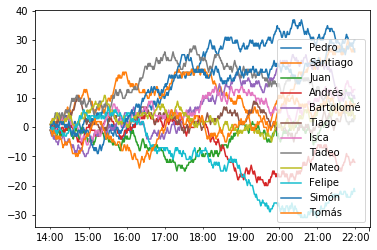

In [2]:
import numpy as np
import pandas as pd

horas = 8
idx = pd.date_range('20200923 14:00', periods = horas*60, freq = 'min')
nombres = ['Pedro', 'Santiago', 'Juan', 'Andrés','Bartolomé','Tiago','Isca','Tadeo','Mateo','Felipe','Simón','Tomás']

df_walks = pd.DataFrame(np.random.randint(-1,2,[horas*60,12]).cumsum(axis=0), index = idx, columns = nombres)
df_walks.plot()

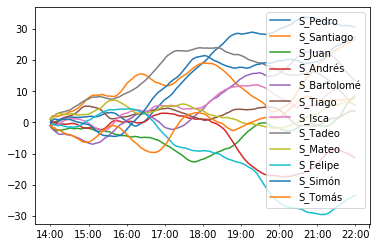

In [3]:
w = 45
df_walk_suav = df_walks.rolling(w, min_periods = 1).mean() # datos suavizados
nsuav = ['S_' + n for n in nombres]
df_walk_suav.columns = nsuav # cambio el nombre de las columnas
                             # para los datos suavizados
df_walk_suav.plot()

In [4]:
df_walk_suav.to_csv('caminata_apostolica.csv')

In [9]:
df_archivo = pd.read_csv('../Data/arbolado-publico-lineal-2017-2018.csv')
cols_sel = ['nombre_cientifico', 'ancho_acera', 'diametro_altura_pecho', 'altura_arbol']
df_lineal = df_archivo[cols_sel]
especies_seleccionadas = ['Tilia x moltkei', 'Jacaranda mimosifolia', 'Tipuana tipu']
df_lineal_seleccion = df_lineal[df_lineal['nombre_cientifico'].isin(especies_seleccionadas)]

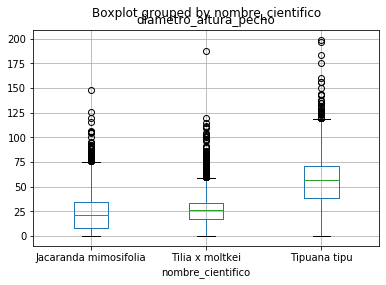

In [10]:
df_lineal_seleccion.boxplot('diametro_altura_pecho', by = 'nombre_cientifico')

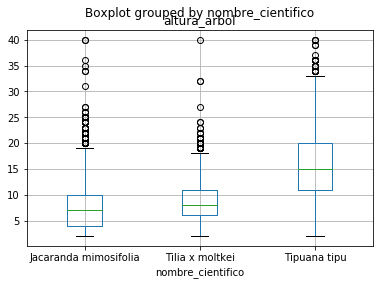

In [11]:
df_lineal_seleccion.boxplot('altura_arbol', by = 'nombre_cientifico')

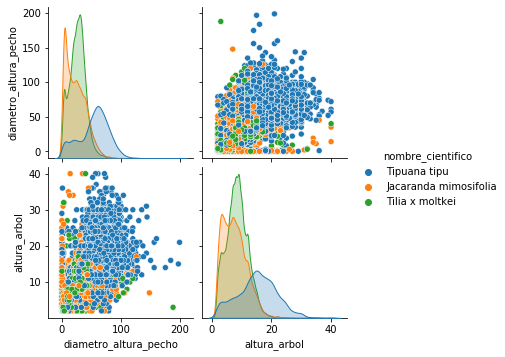

In [12]:
import seaborn as sns

sns.pairplot(data = df_lineal_seleccion[cols_sel], hue = 'nombre_cientifico')

/home/fernando/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


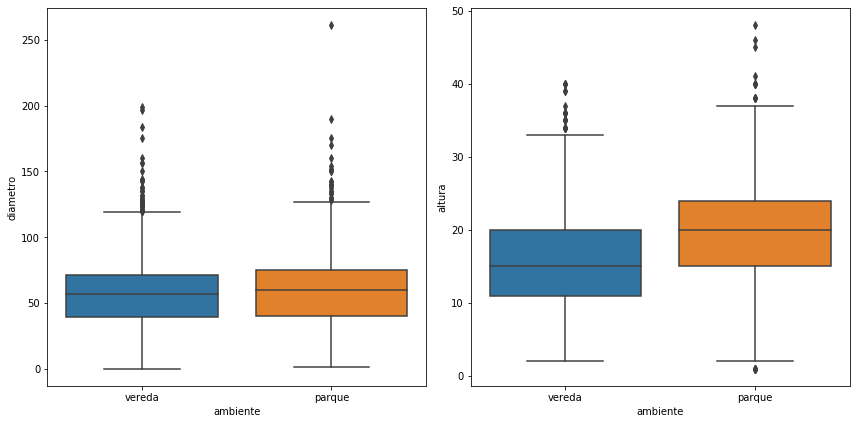

In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


df_parques = pd.read_csv('../Data/arbolado-en-espacios-verdes.csv')
df_veredas = pd.read_csv('../Data/arbolado-publico-lineal-2017-2018.csv')

df_tipas_parques = df_parques[df_parques['nombre_cie'] == 'Tipuana Tipu'][['altura_tot', 'diametro']].copy()
df_tipas_veredas = df_veredas[df_veredas['nombre_cientifico'] == 'Tipuana tipu'][['altura_arbol', 'diametro_altura_pecho']].copy()

df_tipas_parques.rename(columns={'altura_tot': 'altura'}, inplace=True)
df_tipas_veredas.rename(columns={'altura_arbol': 'altura', 'diametro_altura_pecho': 'diametro'}, inplace=True)

df_tipas_parques['ambiente'] = 'parque'
df_tipas_veredas['ambiente'] = 'vereda'

df_tipas = pd.concat([df_tipas_veredas, df_tipas_parques])

f, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='ambiente', y='diametro', data=df_tipas, ax=axs[0])
sns.boxplot(x='ambiente', y='altura', data=df_tipas, ax=axs[1])
f.tight_layout()

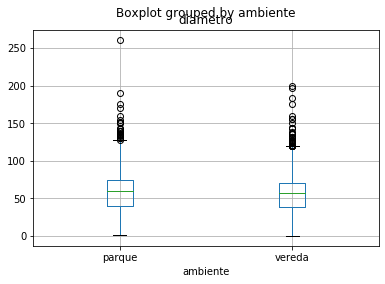

In [29]:
df_tipas.boxplot('diametro',by = 'ambiente')

In [5]:
import pandas as pd


df = pd.read_csv('../Data/OBS_SHN_SF-BA.csv', index_col=['Time'], parse_dates=True)
df.head()

,H_SF,H_BA
Time,,
2011-01-01 00:00:00,NaN,92.0
2011-01-01 01:00:00,NaN,110.0
2011-01-01 02:00:00,NaN,124.0
2011-01-01 03:00:00,NaN,132.0
2011-01-01 04:00:00,NaN,136.0


In [6]:
df.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=35064, freq=None)

In [7]:
df['1-18-2014 9:00':'1-18-2014 18:00']

,H_SF,H_BA
Time,,
2014-01-18 09:00:00,85.0,67.0
2014-01-18 10:00:00,79.0,60.0
2014-01-18 11:00:00,73.0,49.0
2014-01-18 12:00:00,65.0,43.0
2014-01-18 13:00:00,59.0,36.0
2014-01-18 14:00:00,53.0,29.0
2014-01-18 15:00:00,48.0,22.0
2014-01-18 16:00:00,42.0,18.0
2014-01-18 17:00:00,36.0,33.0


In [9]:
#df['2-19-2014']
df['12-25-2014':]

,H_SF,H_BA
Time,,
2014-12-25 00:00:00,121.0,87.0
2014-12-25 01:00:00,109.0,76.0
2014-12-25 02:00:00,93.0,61.0
2014-12-25 03:00:00,79.0,49.0
2014-12-25 04:00:00,70.0,41.0
2014-12-25 05:00:00,62.0,43.0
2014-12-25 06:00:00,60.0,63.0
2014-12-25 07:00:00,75.0,83.0
2014-12-25 08:00:00,102.0,91.0


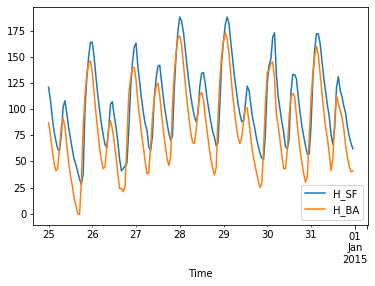

In [11]:
df['12-25-2014':].plot()

In [12]:
dh = df['12-25-2014':].copy()

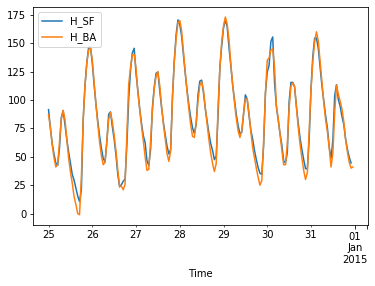

In [24]:
delta_t = -1 # tiempo que tarda la marea entre ambos puertos
delta_h = 17.5 # diferencia de los ceros de escala entre ambos puertos
pd.DataFrame([dh['H_SF'].shift(delta_t) - delta_h, dh['H_BA']]).T.plot()